# ARMA Models in `statsmodels` - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using statsmodels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)

In [3]:
# Preview the dataset
data

,winning_times
year,
1900-01-01,49.4
1904-01-01,49.2
1908-01-01,50.0
1912-01-01,48.2
1920-01-01,49.6
1924-01-01,47.6
1928-01-01,47.8
1932-01-01,46.2
1936-01-01,46.5


Plot this time series data. 

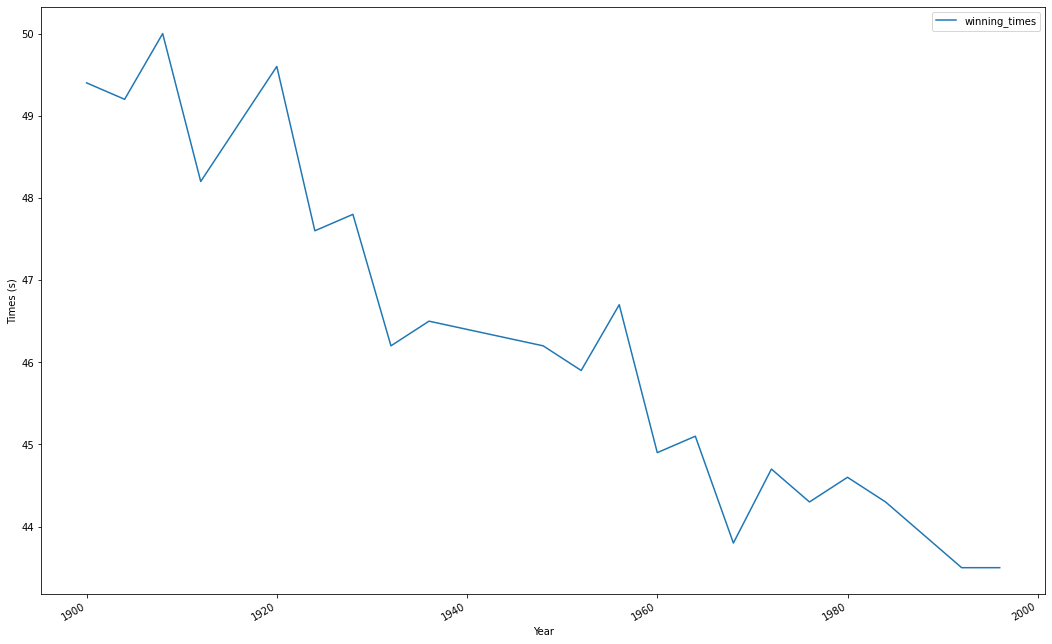

In [4]:
# Plot the time series
data.plot(figsize=(18,12))
plt.xlabel('Year')
plt.ylabel('Times (s)')
plt.legend();

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [5]:
# Difference the time series
data_diff = data.diff().dropna()
data_diff

,winning_times
year,
1904-01-01,-0.2
1908-01-01,0.8
1912-01-01,-1.8
1920-01-01,1.4
1924-01-01,-2.0
1928-01-01,0.2
1932-01-01,-1.6
1936-01-01,0.3
1948-01-01,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

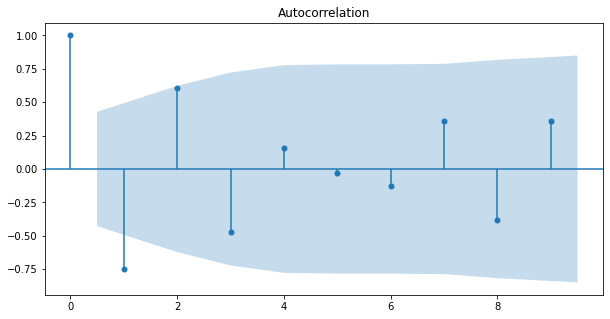

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the ACF
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(data_diff, ax=ax, lags = 9);

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


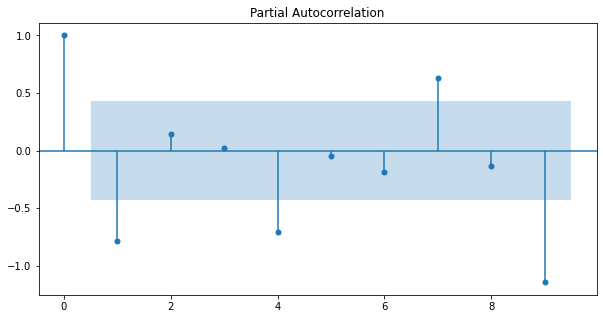

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(data_diff, ax=ax, lags = 9); #

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

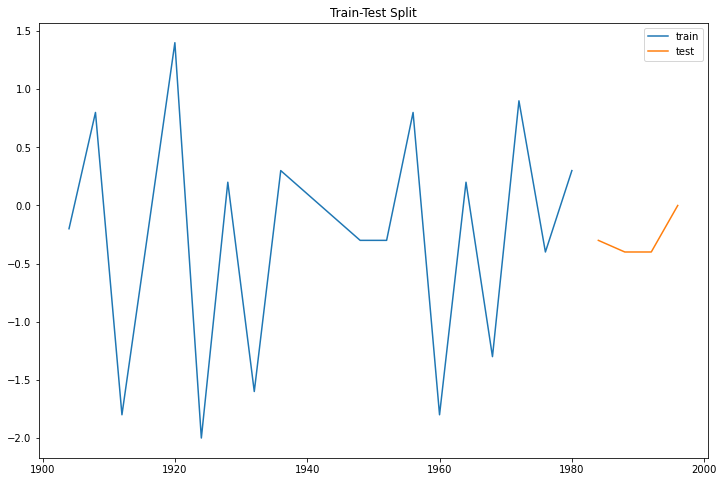

In [8]:
from statsmodels.tsa.arima.model import ARIMA

cutoff = round(data_diff.shape[0]*0.8)
cutoff

train = data_diff[:cutoff]

test = data_diff[cutoff:]

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.set_title('Train-Test Split');
plt.legend();

In [9]:
ar_1 = ARIMA(train, order=(1, 0, 0)).fit()
display(ar_1.summary())
display("AIC is: ", ar_1.aic)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   17
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -17.808
Date:                Thu, 17 Mar 2022   AIC                             41.615
Time:                        16:52:43   BIC                             44.115
Sample:                             0   HQIC                            41.864
                                 - 17                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2997      0.101     -2.958      0.003      -0.498      -0.101
ar.L1         -0.7255      0.171     -4.237      0.000      -1.061      -0.390
sigma2         0.4553      0.286      1.591      0.112      -0.106       1.016
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.45
Prob(Q):                              0.89   Prob(JB):                         0.48
Heteroskedasticity (H):               0.78   Skew:                             0.26
Prob(H) (two-sided):                  0.77   Kurtosis:                         1.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

'AIC is: '

41.61507720117604

In [10]:
ar_2 = ARIMA(train, order=(1, 0, 1)).fit()
display(ar_2.summary())
display("AIC is: ", ar_2.aic)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   17
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -17.733
Date:                Thu, 17 Mar 2022   AIC                             43.465
Time:                        16:52:43   BIC                             46.798
Sample:                             0   HQIC                            43.796
                                 - 17                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2947      0.109     -2.704      0.007      -0.508      -0.081
ar.L1         -0.7766      0.210     -3.690      0.000      -1.189      -0.364
ma.L1          0.1194      0.344      0.347      0.729      -0.555       0.794
sigma2         0.4514      0.288      1.565      0.118      -0.114       1.017
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 1.47
Prob(Q):                              0.87   Prob(JB):                         0.48
Heteroskedasticity (H):               0.71   Skew:                             0.28
Prob(H) (two-sided):                  0.69   Kurtosis:                         1.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

'AIC is: '

43.465028530651416

In [11]:
ar_3 = ARIMA(train, order=(1, 1, 1)).fit()
display(ar_3.summary())
display("AIC is: ", ar_3.aic)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   17
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -19.199
Date:                Thu, 17 Mar 2022   AIC                             44.398
Time:                        16:52:43   BIC                             46.715
Sample:                             0   HQIC                            44.516
                                 - 17                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7102      0.184     -3.856      0.000      -1.071      -0.349
ma.L1         -0.9988     51.356     -0.019      0.984    -101.654      99.657
sigma2         0.4861     24.901      0.020      0.984     -48.320      49.292
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 1.02
Prob(Q):                              0.75   Prob(JB):                         0.60
Heteroskedasticity (H):               0.61   Skew:                            -0.01
Prob(H) (two-sided):                  0.60   Kurtosis:                         1.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

'AIC is: '

44.39770586739955

In [31]:
ar_4 = ARIMA(train, order=(2, 0, 2)).fit()
display(ar_4.summary())
display("AIC is: ", ar_4.aic)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   17
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -14.036
Date:                Thu, 17 Mar 2022   AIC                             40.072
Time:                        16:54:47   BIC                             45.071
Sample:                             0   HQIC                            40.569
                                 - 17                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2738      0.115     -2.371      0.018      -0.500      -0.048
ar.L1         -1.8639      0.041    -45.543      0.000      -1.944      -1.784
ar.L2         -0.9972      0.044    -22.797      0.000      -1.083      -0.911
ma.L1          1.8067     24.755      0.073      0.942     -46.713      50.326
ma.L2          0.9937     27.323      0.036      0.971     -52.558      54.545
sigma2         0.2055      5.543      0.037      0.970     -10.658      11.069
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                 0.85
Prob(Q):                              0.65   Prob(JB):                         0.65
Heteroskedasticity (H):               0.80   Skew:                            -0.48
Prob(H) (two-sided):                  0.79   Kurtosis:                         2.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

'AIC is: '

40.07201572420675

In [32]:
ar_5 = ARIMA(train, order=(2, 1, 2)).fit()
display(ar_5.summary())
display("AIC is: ", ar_5.aic)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   17
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -18.361
Date:                Thu, 17 Mar 2022   AIC                             46.722
Time:                        16:54:47   BIC                             50.585
Sample:                             0   HQIC                            46.920
                                 - 17                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6736      0.213     -7.870      0.000      -2.090      -1.257
ar.L2         -0.7683      0.177     -4.335      0.000      -1.116      -0.421
ma.L1          0.0012   3578.190   3.26e-07      1.000   -7013.122    7013.124
ma.L2         -0.9988   3626.437     -0.000      1.000   -7108.685    7106.688
sigma2         0.3940   1430.281      0.000      1.000   -2802.905    2803.693
===================================================================================
Ljung-Box (L1) (Q):                   1.34   Jarque-Bera (JB):                 1.38
Prob(Q):                              0.25   Prob(JB):                         0.50
Heteroskedasticity (H):               0.93   Skew:                            -0.25
Prob(H) (two-sided):                  0.94   Kurtosis:                         1.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

'AIC is: '

46.722344179889575

In [33]:
ar_6 = ARIMA(train, order=(2, 0, 4)).fit()
display(ar_6.summary())
display("AIC is: ", ar_6.aic)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977:

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   17
Model:                 ARIMA(2, 0, 4)   Log Likelihood                 -14.529
Date:                Thu, 17 Mar 2022   AIC                             45.058
Time:                        16:54:48   BIC                             51.724
Sample:                             0   HQIC                            45.721
                                 - 17                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3378      0.082     -4.108      0.000      -0.499      -0.177
ar.L1         -0.9736      0.682     -1.428      0.153      -2.310       0.363
ar.L2         -0.0953      0.520     -0.183      0.855      -1.114       0.924
ma.L1          0.0955    271.162      0.000      1.000    -531.373     531.564
ma.L2         -0.0136    289.130  -4.71e-05      1.000    -566.698     566.671
ma.L3         -0.0991    292.895     -0.000      1.000    -574.163     573.964
ma.L4         -0.9821    264.898     -0.004      0.997    -520.173     518.209
sigma2         0.2205     59.412      0.004      0.997    -116.224     116.665
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.18
Prob(Q):                              0.97   Prob(JB):                         0.91
Heteroskedasticity (H):               1.07   Skew:                            -0.05
Prob(H) (two-sided):                  0.94   Kurtosis:                         2.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

'AIC is: '

45.058366577988366

In [34]:
display(ar_1.aic)
display(ar_2.aic)
display(ar_3.aic)
display(ar_4.aic)
display(ar_5.aic)
display(ar_6.aic)

41.61507720117604

43.465028530651416

44.39770586739955

40.07201572420675

46.722344179889575

45.058366577988366

In [35]:
from sklearn.metrics import mean_squared_error


print(np.sqrt(mean_squared_error(train, ar_1.predict(typ='levels'))))
print(np.sqrt(mean_squared_error(train, ar_2.predict(typ='levels'))))
print(np.sqrt(mean_squared_error(train, ar_3.predict(typ='levels'))))
print(np.sqrt(mean_squared_error(train, ar_4.predict(typ='levels'))))
print(np.sqrt(mean_squared_error(train, ar_5.predict(typ='levels'))))
print(np.sqrt(mean_squared_error(train, ar_6.predict(typ='levels'))))


0.6749734106109935
0.6724901072079614
0.8026012075403364
0.5573817462235725
0.7808870609922817
0.5705242948686706


## What is your final model? Why did you pick this model?

My best fitting model based on AIC and RMSE was mode 4 where I set AR to 2, diff to 0 and MA to 2. I chose this as on the ACF Plot both 1 and 2 were outside of the confidence interval range.  The PACF plot showed that 1, 4,
7, and 9 were outside of the confidence interval range"""

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 